# Computational Drug Discovery - Neural Network

## 1. Data Collection

### ChEMBL Database
Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# ChEMBL web service package
from chembl_webresource_client.new_client import new_client

### Search for Target Protein for Herpes virus

In [2]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('herpes')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Tumor necrosis factor ligand superfamily membe...,11.0,False,CHEMBL3712914,"[{'accession': 'O43557', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cereblon/Nectin-1,11.0,False,CHEMBL4742295,"[{'accession': 'Q96SW2', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,"[{'xref_id': 'P16753', 'xref_name': None, 'xre...",Human cytomegalovirus (strain AD169) (HHV-5) (...,Human herpes virus 5 capsid protein P40,10.0,False,CHEMBL3771,"[{'accession': 'P16753', 'component_descriptio...",SINGLE PROTEIN,10360
3,[],Herpes simplex virus (type 1 / strain F),Herpes simplex virus (type 1 / strain F),10.0,False,CHEMBL613200,[],ORGANISM,10304


### Select and retrieve bioactivity data for Human herpes virus 5 capsid protein P40 (third entry)

We will assign the third entry (which corresponds to the target protein, Human herpes virus 5 capsid protein P40) to the selected_target variable

In [3]:
selected_target = targets.target_chembl_id[2]
selected_target

'CHEMBL3771'

Here, we will retrieve only bioactivity data for Human herpes virus 5 capsid protein P40 (CHEMBL3771) that are reported as IC values in nM (nanomolar) unit

In [4]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [5]:
df = pd.DataFrame.from_dict(res)

#See all columns in dataframe
pd.options.display.max_columns = None
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32116,[],CHEMBL884029,Concentration required to inhibit the mutant a...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)O[C@@H]1CC(=O)N1C(=O)NC(C)C,None,None,CHEMBL1130748,Bioorg Med Chem Lett,1998,None,CHEMBL122071,None,CHEMBL122071,None,0,http://www.openphacts.org/units/Nanomolar,232631,>,1,1,>,None,IC50,nM,None,100000.0,CHEMBL3771,Human cytomegalovirus (strain AD169) (HHV-5) (...,Human herpes virus 5 capsid protein P40,10360,None,None,IC50,uM,UO_0000065,None,100.0
1,None,None,34560,[],CHEMBL884029,Concentration required to inhibit the mutant a...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCCCNC(=O)N1C(=O)C[C@H]1OC(C)=O,None,None,CHEMBL1130748,Bioorg Med Chem Lett,1998,"{'bei': '18.26', 'le': '0.36', 'lle': '3.55', ...",CHEMBL124107,None,CHEMBL124107,4.17,0,http://www.openphacts.org/units/Nanomolar,232614,=,1,1,=,None,IC50,nM,None,68000.0,CHEMBL3771,Human cytomegalovirus (strain AD169) (HHV-5) (...,Human herpes virus 5 capsid protein P40,10360,None,None,IC50,uM,UO_0000065,None,68.0
2,None,None,35750,[],CHEMBL884029,Concentration required to inhibit the mutant a...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C...,None,None,CHEMBL1130748,Bioorg Med Chem Lett,1998,None,CHEMBL120853,None,CHEMBL120853,None,0,http://www.openphacts.org/units/Nanomolar,232624,>,1,1,>,None,IC50,nM,None,100000.0,CHEMBL3771,Human cytomegalovirus (strain AD169) (HHV-5) (...,Human herpes virus 5 capsid protein P40,10360,None,None,IC50,uM,UO_0000065,None,100.0
3,None,None,36956,[],CHEMBL884029,Concentration required to inhibit the mutant a...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)O[C@@H]1[C@@H](C)C(=O)N1C(=O)NCc1ccccc1,None,None,CHEMBL1130748,Bioorg Med Chem Lett,1998,"{'bei': '18.77', 'le': '0.35', 'lle': '3.93', ...",CHEMBL122296,None,CHEMBL122296,5.19,0,http://www.openphacts.org/units/Nanomolar,232628,=,1,1,=,None,IC50,nM,None,6500.0,CHEMBL3771,Human cytomegalovirus (strain AD169) (HHV-5) (...,Human herpes virus 5 capsid protein P40,10360,None,None,IC50,uM,UO_0000065,None,6.5
4,None,None,43015,[],CHEMBL884029,Concentration required to inhibit the mutant a...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)O[C@@H]1[C@H](C)C(=O)N1C(=O)NCc1ccccc1,None,None,CHEMBL1130748,Bioorg Med Chem Lett,1998,"{'bei': '16.54', 'le': '0.31', 'lle': '3.31', ...",CHEMBL333734,None,CHEMBL333734,4.57,0,http://www.openphacts.org/units/Nanomolar,232616,=,1,1,=,None,IC50,nM,None,27000.0,CHEMBL3771,Human cytomegalovirus (strain AD169) (HHV-5) (...,Human herpes virus 5 capsid protein P40,10360,None,None,IC50,uM,UO_0000065,None,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,None,None,974875,[],CHEMBL873639,Inhibitory activity against Human Cytomegalovi...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1csc2nc(Cc3cccc(NC(=O)c4ccccc4)c3)oc(=O)c12,None,None,CHEMBL1131870,Bioorg Med Chem Lett,1999,"{'bei': '15.47', 'le': '0.29', 'lle': '1.42', ...",CHEMBL106921,None,CHEMBL106921,5.82,0,http://www.openphacts.org/units/Nanomolar,199398,=,1,1,=,None,IC50,nM,None,1500.0,CHEMBL3771,Human cytomegalovirus (stra

In [6]:
df.to_csv('bioactivity_data.csv', index=False)

## 2. Handeling Missing Data

If any compound has missing value for the standard_value column then drop it.

In [7]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32116,[],CHEMBL884029,Concentration required to inhibit the mutant a...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)O[C@@H]1CC(=O)N1C(=O)NC(C)C,None,None,CHEMBL1130748,Bioorg Med Chem Lett,1998,None,CHEMBL122071,None,CHEMBL122071,None,0,http://www.openphacts.org/units/Nanomolar,232631,>,1,1,>,None,IC50,nM,None,100000.0,CHEMBL3771,Human cytomegalovirus (strain AD169) (HHV-5) (...,Human herpes virus 5 capsid protein P40,10360,None,None,IC50,uM,UO_0000065,None,100.0
1,None,None,34560,[],CHEMBL884029,Concentration required to inhibit the mutant a...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCCCNC(=O)N1C(=O)C[C@H]1OC(C)=O,None,None,CHEMBL1130748,Bioorg Med Chem Lett,1998,"{'bei': '18.26', 'le': '0.36', 'lle': '3.55', ...",CHEMBL124107,None,CHEMBL124107,4.17,0,http://www.openphacts.org/units/Nanomolar,232614,=,1,1,=,None,IC50,nM,None,68000.0,CHEMBL3771,Human cytomegalovirus (strain AD169) (HHV-5) (...,Human herpes virus 5 capsid protein P40,10360,None,None,IC50,uM,UO_0000065,None,68.0
2,None,None,35750,[],CHEMBL884029,Concentration required to inhibit the mutant a...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C...,None,None,CHEMBL1130748,Bioorg Med Chem Lett,1998,None,CHEMBL120853,None,CHEMBL120853,None,0,http://www.openphacts.org/units/Nanomolar,232624,>,1,1,>,None,IC50,nM,None,100000.0,CHEMBL3771,Human cytomegalovirus (strain AD169) (HHV-5) (...,Human herpes virus 5 capsid protein P40,10360,None,None,IC50,uM,UO_0000065,None,100.0
3,None,None,36956,[],CHEMBL884029,Concentration required to inhibit the mutant a...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)O[C@@H]1[C@@H](C)C(=O)N1C(=O)NCc1ccccc1,None,None,CHEMBL1130748,Bioorg Med Chem Lett,1998,"{'bei': '18.77', 'le': '0.35', 'lle': '3.93', ...",CHEMBL122296,None,CHEMBL122296,5.19,0,http://www.openphacts.org/units/Nanomolar,232628,=,1,1,=,None,IC50,nM,None,6500.0,CHEMBL3771,Human cytomegalovirus (strain AD169) (HHV-5) (...,Human herpes virus 5 capsid protein P40,10360,None,None,IC50,uM,UO_0000065,None,6.5
4,None,None,43015,[],CHEMBL884029,Concentration required to inhibit the mutant a...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)O[C@@H]1[C@H](C)C(=O)N1C(=O)NCc1ccccc1,None,None,CHEMBL1130748,Bioorg Med Chem Lett,1998,"{'bei': '16.54', 'le': '0.31', 'lle': '3.31', ...",CHEMBL333734,None,CHEMBL333734,4.57,0,http://www.openphacts.org/units/Nanomolar,232616,=,1,1,=,None,IC50,nM,None,27000.0,CHEMBL3771,Human cytomegalovirus (strain AD169) (HHV-5) (...,Human herpes virus 5 capsid protein P40,10360,None,None,IC50,uM,UO_0000065,None,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,None,None,974875,[],CHEMBL873639,Inhibitory activity against Human Cytomegalovi...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1csc2nc(Cc3cccc(NC(=O)c4ccccc4)c3)oc(=O)c12,None,None,CHEMBL1131870,Bioorg Med Chem Lett,1999,"{'bei': '15.47', 'le': '0.29', 'lle': '1.42', ...",CHEMBL106921,None,CHEMBL106921,5.82,0,http://www.openphacts.org/units/Nanomolar,199398,=,1,1,=,None,IC50,nM,None,1500.0,CHEMBL3771,Human cytomegalovirus (stra

There is not any missing values in this dataset.


## 3. Data Preprocessing

### Labeling Compounds As Active, Inactive, and Intermediate

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. Those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [8]:
df3 = df2[['molecule_chembl_id', 'canonical_smiles', 'standard_value']]
df3 = df3.copy()
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL122071,CC(=O)O[C@@H]1CC(=O)N1C(=O)NC(C)C,100000.0
1,CHEMBL124107,CCCCNC(=O)N1C(=O)C[C@H]1OC(C)=O,68000.0
2,CHEMBL120853,C[C@@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C...,100000.0
3,CHEMBL122296,CC(=O)O[C@@H]1[C@@H](C)C(=O)N1C(=O)NCc1ccccc1,6500.0
4,CHEMBL333734,CC(=O)O[C@@H]1[C@H](C)C(=O)N1C(=O)NCc1ccccc1,27000.0
...,...,...,...
233,CHEMBL106921,Cc1csc2nc(Cc3cccc(NC(=O)c4ccccc4)c3)oc(=O)c12,1500.0
234,CHEMBL107963,Cc1csc2nc(Cc3cccc(NC(=O)c4ccc(NN)cc4)c3)oc(=O)c12,2400.0
235,CHEMBL106641,CC(=O)c1cccc(NO)c1,11000.0
236,CHEMBL108677,Cc1csc2nc(Cc3cccc(NC(=O)c4ccc(NO)cc4)c3)oc(=O)c12,61.0


In [9]:
# See the dataframe information
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  238 non-null    object
 1   canonical_smiles    238 non-null    object
 2   standard_value      238 non-null    object
dtypes: object(3)
memory usage: 7.4+ KB


Change the data type of `standard_value` column from object to float.

In [10]:
df3['standard_value'] = df3['standard_value'].astype(float)

In [11]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [12]:
df3['bioactivity_class'] = bioactivity_class
df3

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL122071,CC(=O)O[C@@H]1CC(=O)N1C(=O)NC(C)C,100000.0,inactive
1,CHEMBL124107,CCCCNC(=O)N1C(=O)C[C@H]1OC(C)=O,68000.0,inactive
2,CHEMBL120853,C[C@@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C...,100000.0,inactive
3,CHEMBL122296,CC(=O)O[C@@H]1[C@@H](C)C(=O)N1C(=O)NCc1ccccc1,6500.0,intermediate
4,CHEMBL333734,CC(=O)O[C@@H]1[C@H](C)C(=O)N1C(=O)NCc1ccccc1,27000.0,inactive
...,...,...,...,...
233,CHEMBL106921,Cc1csc2nc(Cc3cccc(NC(=O)c4ccccc4)c3)oc(=O)c12,1500.0,intermediate
234,CHEMBL107963,Cc1csc2nc(Cc3cccc(NC(=O)c4ccc(NN)cc4)c3)oc(=O)c12,2400.0,intermediate
235,CHEMBL106641,CC(=O)c1cccc(NO)c1,11000.0,inactive
236,CHEMBL108677,Cc1csc2nc(Cc3cccc(NC(=O)c4ccc(NO)cc4)c3)oc(=O)c12,61.0,active


In [13]:
# Save fole to a csv format
df3.to_csv('bioactivity_preprocessed_data.csv', index=False)

## 4.Calculate Lipinski's Descriptors

**Lipinski's descriptors**, also known as Lipinski's Rule of Five, are a set of four simple molecular properties used in drug discovery and medicinal chemistry to evaluate the drug-likeness and oral bioavailability of small molecules. Such drug-likeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. These descriptors were formulated by Christopher A. Lipinski in 1997 and have since become widely adopted in the pharmaceutical industry.

The four descriptors are:

1. **Molecular Weight (MW):** The molecular weight of the compound should be less than or equal to 500 g/mol. This guideline helps ensure that the compound is small enough to be efficiently absorbed by the body.

2. **Octanol-Water Partition Coefficient (LogP):** The logarithm of the partition coefficient between octanol and water (LogP) should be less than or equal to 5. A higher LogP value suggests that the compound is more lipophilic, which can lead to poor aqueous solubility and hinder absorption.

3. **Hydrogen Bond Donors (HBD):** The number of hydrogen bond donor groups (e.g., NH and OH) should be less than or equal to 5. Compounds with excessive hydrogen bond donors may have difficulty crossing biological membranes.

4. **Hydrogen Bond Acceptors (HBA):** The number of hydrogen bond acceptor atoms (e.g., N and O) should be less than or equal to 10. Compounds with a high number of hydrogen bond acceptors may have reduced oral bioavailability.

In [14]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [15]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [16]:
# Calculate Lipinski
df_lipinski = lipinski(df3.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,214.221,0.22590,1.0,4.0
1,228.248,0.61760,1.0,4.0
2,354.362,2.47780,2.0,4.0
3,276.292,1.26370,1.0,4.0
4,276.292,1.26370,1.0,4.0
...,...,...,...,...
233,376.437,4.40102,1.0,5.0
234,406.467,3.68662,3.0,7.0
235,151.165,1.69030,2.0,3.0
236,407.451,4.20212,3.0,7.0


In [17]:
# Combne two dataframes
df4 = pd.concat([df3,df_lipinski], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL122071,CC(=O)O[C@@H]1CC(=O)N1C(=O)NC(C)C,100000.0,inactive,214.221,0.22590,1.0,4.0
1,CHEMBL124107,CCCCNC(=O)N1C(=O)C[C@H]1OC(C)=O,68000.0,inactive,228.248,0.61760,1.0,4.0
2,CHEMBL120853,C[C@@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C...,100000.0,inactive,354.362,2.47780,2.0,4.0
3,CHEMBL122296,CC(=O)O[C@@H]1[C@@H](C)C(=O)N1C(=O)NCc1ccccc1,6500.0,intermediate,276.292,1.26370,1.0,4.0
4,CHEMBL333734,CC(=O)O[C@@H]1[C@H](C)C(=O)N1C(=O)NCc1ccccc1,27000.0,inactive,276.292,1.26370,1.0,4.0
...,...,...,...,...,...,...,...,...
233,CHEMBL106921,Cc1csc2nc(Cc3cccc(NC(=O)c4ccccc4)c3)oc(=O)c12,1500.0,intermediate,376.437,4.40102,1.0,5.0
234,CHEMBL107963,Cc1csc2nc(Cc3cccc(NC(=O)c4ccc(NN)cc4)c3)oc(=O)c12,2400.0,intermediate,406.467,3.68662,3.0,7.0
235,CHEMBL106641,CC(=O)c1cccc(NO)c1,11000.0,inactive,151.165,1.69030,2.0,3.0
236,CHEMBL108677,Cc1csc2nc(Cc3cccc(NC(=O)c4ccc(NO)cc4)c3)oc(=O)c12,61.0,active,407.451,4.20212,3.0,7.0


## 5. Convert IC50 to pIC50

To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [18]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input, standard_value='standard_value'):
    pIC50 = []

    for i in input[standard_value]:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns=standard_value)
        
    return x

In [19]:
df4.standard_value.describe()

count        238.000000
mean       55777.338235
std       139831.923802
min            2.700000
25%          182.500000
50%         1400.000000
75%        33000.000000
max      1000000.000000
Name: standard_value, dtype: float64

**Notice:** Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [20]:
df5 = pIC50(df4)
df5

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL122071,CC(=O)O[C@@H]1CC(=O)N1C(=O)NC(C)C,inactive,214.221,0.22590,1.0,4.0,4.000000
1,CHEMBL124107,CCCCNC(=O)N1C(=O)C[C@H]1OC(C)=O,inactive,228.248,0.61760,1.0,4.0,4.167491
2,CHEMBL120853,C[C@@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C...,inactive,354.362,2.47780,2.0,4.0,4.000000
3,CHEMBL122296,CC(=O)O[C@@H]1[C@@H](C)C(=O)N1C(=O)NCc1ccccc1,intermediate,276.292,1.26370,1.0,4.0,5.187087
4,CHEMBL333734,CC(=O)O[C@@H]1[C@H](C)C(=O)N1C(=O)NCc1ccccc1,inactive,276.292,1.26370,1.0,4.0,4.568636
...,...,...,...,...,...,...,...,...
233,CHEMBL106921,Cc1csc2nc(Cc3cccc(NC(=O)c4ccccc4)c3)oc(=O)c12,intermediate,376.437,4.40102,1.0,5.0,5.823909
234,CHEMBL107963,Cc1csc2nc(Cc3cccc(NC(=O)c4ccc(NN)cc4)c3)oc(=O)c12,intermediate,406.467,3.68662,3.0,7.0,5.619789
235,CHEMBL106641,CC(=O)c1cccc(NO)c1,inactive,151.165,1.69030,2.0,3.0,4.958607
236,CHEMBL108677,Cc1csc2nc(Cc3cccc(NC(=O)c4ccc(NO)cc4)c3)oc(=O)c12,active,407.451,4.20212,3.0,7.0,7.214670


In [21]:
df5.pIC50.describe()

count    238.000000
mean       5.791941
std        1.473780
min        3.000000
25%        4.481486
50%        5.853872
75%        6.738857
max        8.568636
Name: pIC50, dtype: float64

In [22]:
df5.to_csv('herpesvirus5_capsid_protein_P40_bioactivity_data_3class_pIC50.csv')

## 7. Exploratory Data Analysis

In [23]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of the bioactivity classes

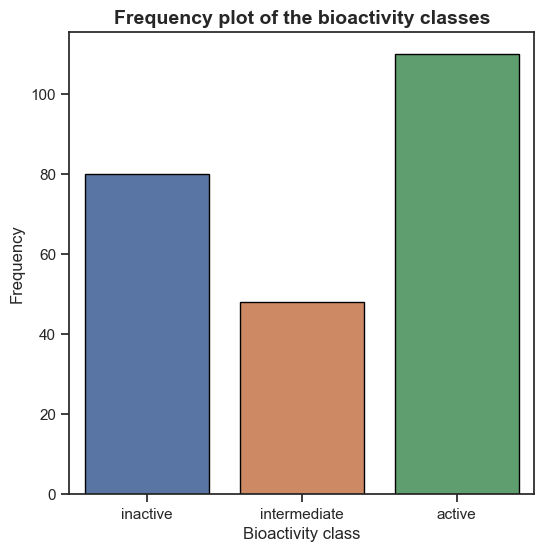

In [24]:
plt.figure(figsize=(6, 6))

sns.countplot(x='bioactivity_class', data=df5, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency plot of the bioactivity classes', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter plot of LogP vs. MW

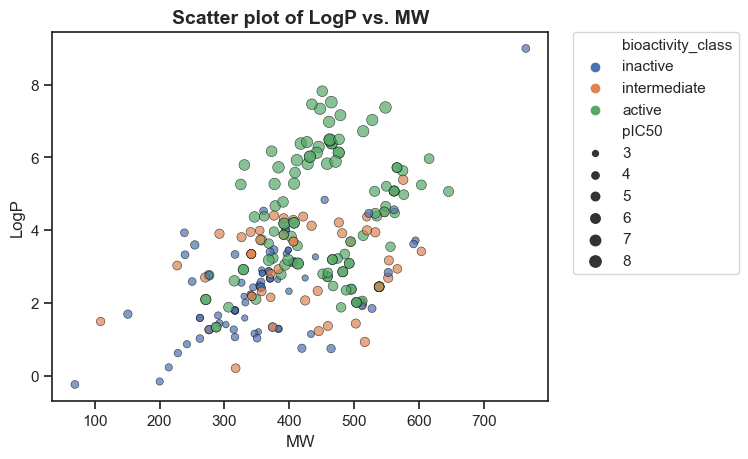

In [25]:
sns.scatterplot(x='MW', y='LogP', data=df5, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=12)
plt.ylabel('LogP', fontsize=12)
plt.title('Scatter plot of LogP vs. MW', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### Box plot of pIC50 value

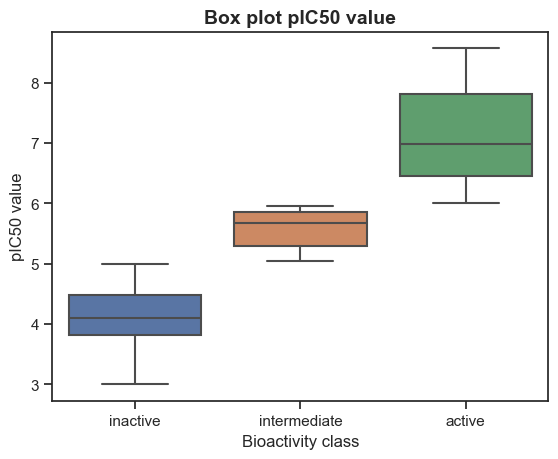

In [26]:
sns.boxplot(x='bioactivity_class', y='pIC50', data= df5)

plt.xlabel('Bioactivity class', fontsize=12)
plt.ylabel('pIC50 value', fontsize=12)
plt.title('Box plot pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

### Statistical Analysis | Mann-Whitney U test

The Mann-Whitney U test, also known as the Mann-Whitney-Wilcoxon test, is a non-parametric statistical test used to determine whether there is a significant difference between the distributions of two independent groups.

Here's a general overview of the steps involved in conducting the Mann-Whitney U test:

1. Define the null hypothesis (H0) and alternative hypothesis (H1):

    H0: The distributions of the two groups are equal (no difference).
    
    H1: The distributions of the two groups are not equal (there is a difference).

2. Rank all the observations from both groups combined, from lowest to highest. In case of ties, assign the average rank to the tied observations.

3. Calculate the sum of the ranks for each group separately: U1 for Group 1 and U2 for Group 2.

4. Calculate the U statistic, which is the smaller of U1 and U2.

5. Determine the critical value or p-value based on the U statistic. The critical value can be obtained from statistical tables, or the p-value can be calculated using software or statistical functions.

6. Compare the critical value or p-value with the chosen significance level (e.g., 0.05) to make a decision. If the p-value is less than the significance level, the null hypothesis is rejected, indicating a significant difference between the groups.

In [27]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed, randn
  from scipy.stats import mannwhitneyu

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df5[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df5[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [28]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,8800.0,6.181124e-32,0.05,Different distribution (reject H0)


The p-value obtained (6.181124e-32) is significantly smaller than the chosen significance level (0.05). Therefore, the test concludes that there is a statistically significant difference between the distributions of the groups being compared. The null hypothesis (H0) is rejected, suggesting that the pIC50 values come from different distributions. 

Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference , which is to be expected since threshold values ​​( IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

### Box plot of MW

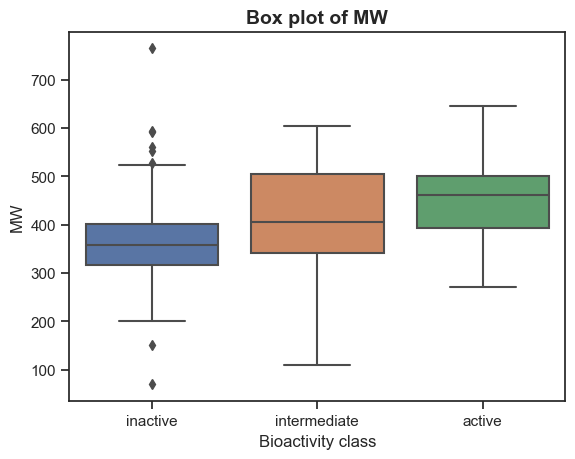

In [29]:
sns.boxplot(x='bioactivity_class', y='MW', data=df5)

plt.xlabel('Bioactivity class', fontsize=12)
plt.ylabel('MW', fontsize=12)
plt.title('Box plot of MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [30]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,6720.0,5.723879e-10,0.05,Different distribution (reject H0)


The obtained p-value (5.723879e-10) is significantly smaller than the significance level (0.05). Hence, there is a statistically significant difference between the distributions of the groups. The null hypothesis is rejected, indicating that the Molecular Weight values come from different distributions.

### Box plot of LogP

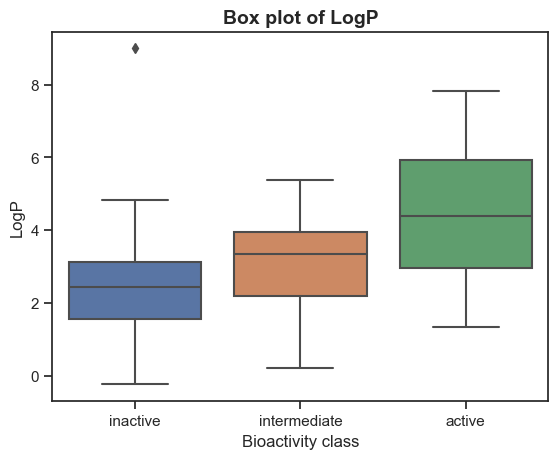

In [31]:
sns.boxplot(x='bioactivity_class', y='LogP', data=df5)

plt.xlabel('Bioactivity class', fontsize=12)
plt.ylabel('LogP', fontsize=12)
plt.title('Box plot of LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [32]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,7302.0,8.980151e-15,0.05,Different distribution (reject H0)


The p-value (8.980151e-15) is considerably smaller than the significance level (0.05). Consequently, the test indicates a significant difference between the distributions of the groups being compared. The null hypothesis is rejected, suggesting that the LogP values come from different distributions.

### Box plot of NumHDonors

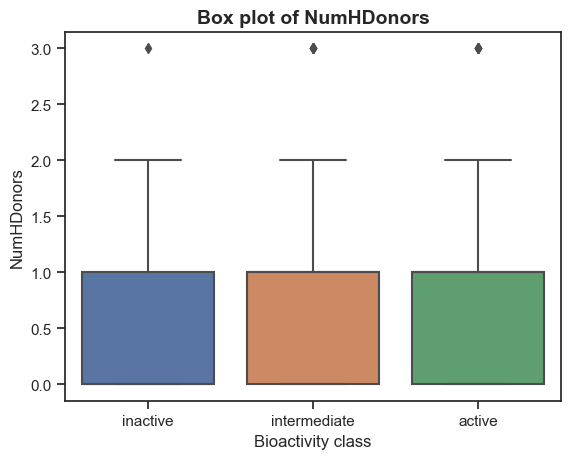

In [33]:
sns.boxplot(x='bioactivity_class', y='NumHDonors', data=df5)

plt.xlabel('Bioactivity class', fontsize=12)
plt.ylabel('NumHDonors', fontsize=12)
plt.title('Box plot of NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [34]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,5749.5,0.0001,0.05,Different distribution (reject H0)


The p-value obtained (0.0001) is smaller than the significance level (0.05). Hence, there is a statistically significant difference between the distributions of the groups. The null hypothesis is rejected, indicating that the Number of Hydrogen Bond Donors values come from different distributions.

### Box plot of NumHA Acceptors

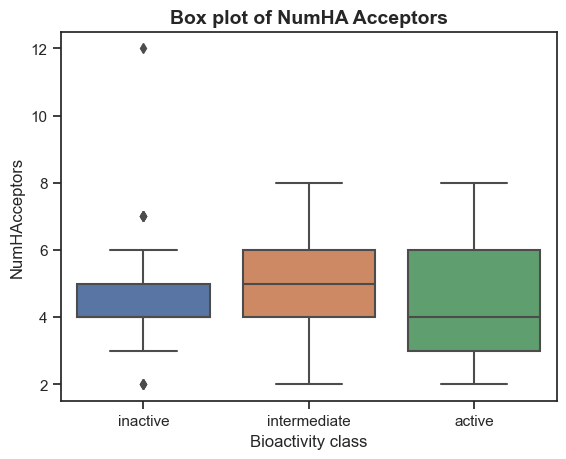

In [35]:
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=df5)

plt.xlabel('Bioactivity class', fontsize=12)
plt.ylabel('NumHAcceptors', fontsize=12)
plt.title('Box plot of NumHA Acceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [36]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4432.5,0.929728,0.05,Same distribution (fail to reject H0)


The p-value (0.929728) is larger than the significance level (0.05). Therefore, the test fails to find sufficient evidence to reject the null hypothesis. This suggests that there is no statistically significant difference between the distributions of the groups for the Number of Hydrogen Bond Acceptors.

## 8. Descriptor Calculation and Dataset Preparation

PaDEL-Descriptor is a software for calculating molecular descriptors and fingerprints. `PaDELPy` provides a Python wrapper for the PaDEL-Descriptor molecular descriptor calculation software.

In [37]:
from padelpy import padeldescriptor

In [38]:
df5

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL122071,CC(=O)O[C@@H]1CC(=O)N1C(=O)NC(C)C,inactive,214.221,0.22590,1.0,4.0,4.000000
1,CHEMBL124107,CCCCNC(=O)N1C(=O)C[C@H]1OC(C)=O,inactive,228.248,0.61760,1.0,4.0,4.167491
2,CHEMBL120853,C[C@@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C...,inactive,354.362,2.47780,2.0,4.0,4.000000
3,CHEMBL122296,CC(=O)O[C@@H]1[C@@H](C)C(=O)N1C(=O)NCc1ccccc1,intermediate,276.292,1.26370,1.0,4.0,5.187087
4,CHEMBL333734,CC(=O)O[C@@H]1[C@H](C)C(=O)N1C(=O)NCc1ccccc1,inactive,276.292,1.26370,1.0,4.0,4.568636
...,...,...,...,...,...,...,...,...
233,CHEMBL106921,Cc1csc2nc(Cc3cccc(NC(=O)c4ccccc4)c3)oc(=O)c12,intermediate,376.437,4.40102,1.0,5.0,5.823909
234,CHEMBL107963,Cc1csc2nc(Cc3cccc(NC(=O)c4ccc(NN)cc4)c3)oc(=O)c12,intermediate,406.467,3.68662,3.0,7.0,5.619789
235,CHEMBL106641,CC(=O)c1cccc(NO)c1,inactive,151.165,1.69030,2.0,3.0,4.958607
236,CHEMBL108677,Cc1csc2nc(Cc3cccc(NC(=O)c4ccc(NO)cc4)c3)oc(=O)c12,active,407.451,4.20212,3.0,7.0,7.214670


In [39]:
df5_selection = df5[['canonical_smiles', 'molecule_chembl_id']]
df5_selection.to_csv('molecules.smi', sep='\t', index=False, header=False)

In [40]:
df5_selection.head()

,canonical_smiles,molecule_chembl_id
0,CC(=O)O[C@@H]1CC(=O)N1C(=O)NC(C)C,CHEMBL122071
1,CCCCNC(=O)N1C(=O)C[C@H]1OC(C)=O,CHEMBL124107
2,C[C@@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C...,CHEMBL120853
3,CC(=O)O[C@@H]1[C@@H](C)C(=O)N1C(=O)NCc1ccccc1,CHEMBL122296
4,CC(=O)O[C@@H]1[C@H](C)C(=O)N1C(=O)NCc1ccccc1,CHEMBL333734


In [41]:
# to calculate PubChem fingerprints
padeldescriptor(mol_dir='molecules.smi', d_file='descriptors.csv', fingerprints=True)

### Define X Data Matrix

In [42]:
df5_X = pd.read_csv('descriptors.csv')
df5_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP

In [43]:
df5_X = df5_X.drop(columns=['Name'])
df5_X.head(3)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP315,P

### Define y Variable

In [44]:
df5_y = df5['pIC50']
df5_y

0      4.000000
1      4.167491
2      4.000000
3      5.187087
4      4.568636
         ...   
233    5.823909
234    5.619789
235    4.958607
236    7.214670
237    4.481486
Name: pIC50, Length: 238, dtype: float64

### Combine X and y Variables

In [45]:
# Combine X and y using concat command
dataset5 = pd.concat([df5_X, df5_y], axis=1)
dataset5

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP315,P

In [46]:
# Save dataset5 file as a csv
dataset5.to_csv('herpesvirus5_capsid_protein_P40_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

## 9. Model Building

### 9.1) XGBoost Model

XGBoost (Extreme Gradient Boosting) is an optimized implementation of the gradient boosting algorithm, which is a popular machine learning technique for regression and also classification tasks. XGBoost combines multiple weak predictive models (typically decision trees) in an iterative manner to build a powerful ensemble model.

In [47]:
# Import related libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Check the data dimentions
print(df5_X.shape)
print(df5_y.shape)

(238, 881)
(238,)


In [49]:
# Remove low varience features
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
df5_X = selection.fit_transform(df5_X)

In [50]:
print(df5_X.shape)

(238, 165)


In [51]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(df5_X, df5_y, test_size=0.2)

In [52]:
# Check the dimention of data
print(f"X_train size= {X_train.shape}")
print(f"X_test size= {X_test.shape}")
print(f"y_train size= {y_train.shape}")
print(f"y_test size= {y_test.shape}")

X_train size= (190, 165)
X_test size= (48, 165)
y_train size= (190,)
y_test size= (48,)


We can perform `GridSearchCV` to search over a specified parameter grid to find the best combination of hyperparameters for a machine learning model.

In [53]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [1, 2, 3, 4, 6, 8, 10],
    'learning_rate': [0.3, 0.1, 0.01, 0.001]
}

# Create an instance of XGBRegressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2')

# Fit the data to perform the search
grid_search.fit(X_train, y_train)

# Access the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.3, 'max_depth': 2}
Best score:  0.7024286041942505


In [54]:
# Build the XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror',
                                 learning_rate=0.1,
                                 max_depth=4,
                                 random_state=42) 

In [55]:
# Train the XGBoost model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [56]:
# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

#### **Evaluation Model**

MSE (Mean Squared Error) and R2 (R-squared) are two common metrics used to evaluate the performance of regression models. They provide insights into how well the model is fitting the data and making predictions.

**Mean Squared Error (MSE):**
MSE measures the average squared difference between the predicted values and the actual (ground truth) values. It quantifies the overall quality of predictions and provides a measure of how close the predictions are to the true values. A lower MSE indicates a better fit of the model to the data, as it means the model's predictions are closer to the actual values.

**R-squared (R2):**
R-squared, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features) used in the model. It represents the goodness-of-fit of the model, indicating how well the model explains the variability in the target variable. R2 values range from 0 to 1. A value of 1 indicates that the model perfectly fits the data, explaining all the variance, while a value of 0 indicates that the model does not explain any of the variance.

In [57]:
# Calculate mean squared error (MSE) 
mse = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse:.2f}")

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"r2 = {r2:.2f}")

MSE = 0.67
r2 = 0.71


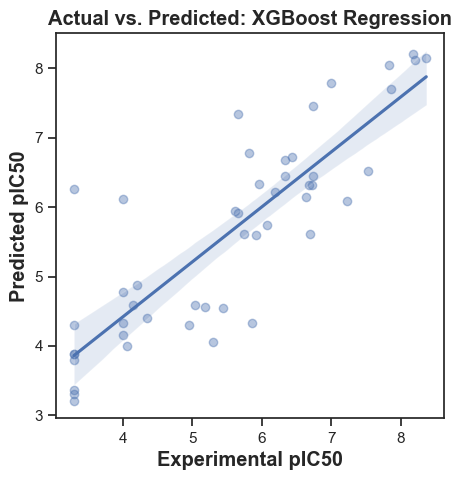

In [58]:
# Plot the actual target values against the predicted values
ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
#ax.set_xlim(0, 12)
#ax.set_ylim(0, 12)
plt.title('Actual vs. Predicted: XGBoost Regression', fontsize='large', fontweight='bold')
ax.figure.set_size_inches(5, 5)
plt.show()

### 9.2) Neural Network Model

We can use the `Keras` library, which is a popular deep learning framework in Python. In this section, we use the Keras library to build a neural network model for regression. 

In [59]:
from tensorflow import keras
from tensorflow.keras import layers

In [60]:
# Define the model architecture
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer with single neuron for regression
])

The model consists of three dense (fully connected) layers. The input layer takes the shape of the input features, and the output layer has a single neuron since it's a regression task. We use the `ReLU` activation function for the hidden layers. 

In continuous, we compile the model with the `Adam optimizer` and `mean squared error (MSE)` loss, which is suitable for regression tasks.

In [61]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)


In [62]:
# Make predictions on the test data
y_pred = model.predict(X_test).flatten()

2/2 [==============================] - 0s 1ms/step


#### **Evaluation Model**

In [63]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse:.2f}")

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"r2 = {r2:.2f}")

MSE = 0.54
r2 = 0.77


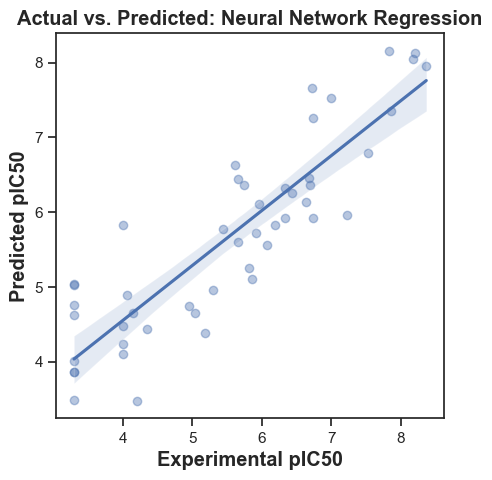

In [64]:
# Plot the actual target values against the predicted values
ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
#ax.set_xlim(0, 12)
#ax.set_ylim(0, 12)
plt.title('Actual vs. Predicted: Neural Network Regression', fontsize='large', fontweight='bold')
ax.figure.set_size_inches(5, 5)
plt.show()

## Model Comparison

**MSE Comparison:** The Neural Network achieved a lower MSE (0.39) compared to the XGBoost model (0.55). A lower MSE indicates that the Neural Network's predictions are, on average, closer to the actual values than the XGBoost model.

**R-squared (R2) Comparison:** The Neural Network also achieved a higher R2 value (0.82) compared to the XGBoost model (0.75). A higher R2 indicates that the Neural Network explains a larger proportion of the variance in the target variable compared to the XGBoost model.

**Overall Performance:** Based on both MSE and R2 metrics, the Neural Network outperforms the XGBoost model on this regression problem. The Neural Network's predictions are more accurate and better explain the variance in the target variable compared to the XGBoost model.